# Matrix norms

Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

Here's a matrix of which we're trying to compute the norm:

In [2]:
n = 2
A = np.random.randn(n, n)
A

array([[-0.26282615,  1.16473733],
       [ 0.50138746,  0.42924875]])

Recall:

$$||A||=\max_{\|x\|=1} \|Ax\|,$$

where the vector norm must be specified, and the value of the matrix norm $\|A\|$ depends on the choice of vector norm.

For instance, for the $p$-norms, we often write:

$$||A||_2=\max_{\|x\|=1} \|Ax\|_2,$$

and similarly for different values of $p$.

--------------------
We can approximate this by just producing very many random vectors and evaluating the formula:

In [3]:
xs = np.random.randn(n, 1000)

First, we need to bring all those vectors to have norm 1. First, compute the norms:

In [4]:
p = 2
norm_xs = np.sum(np.abs(xs)**p, axis=0)**(1/p)
norm_xs.shape

(1000,)

Then, divide by the norms and assign to `normalized_xs`:

Then check the norm of a randomly chosen vector.

In [5]:
#clear
normalized_xs = xs/norm_xs
la.norm(normalized_xs[:, 316], p)

0.9999999999999999

Let's take a look:

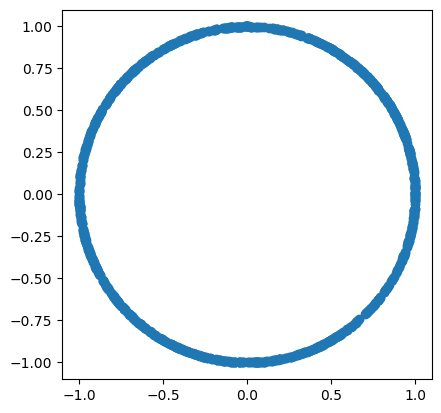

In [6]:
pt.plot(normalized_xs[0], normalized_xs[1], "o")
pt.gca().set_aspect("equal")

Now apply $A$ to these normalized vectors:

In [7]:
#clear
A_nxs = A.dot(normalized_xs)

--------------
Let's take a look again:

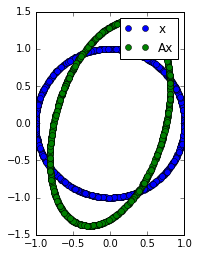

In [8]:
pt.plot(normalized_xs[0], normalized_xs[1], "o", label="x")
pt.plot(A_nxs[0], A_nxs[1], "o", label="Ax")
pt.legend()
pt.gca().set_aspect("equal")

Next, compute norms of the $Ax$ vectors:

In [9]:
#clear
norm_Axs = np.sum(np.abs(A_nxs)**p, axis=0)**(1/p)
norm_Axs.shape

(1000,)

What's the biggest one?

In [10]:
#clear
np.max(norm_Axs)

1.4175372998707851

Compare that with what `numpy` thinks the matrix norm is:

In [11]:
#clear
la.norm(A, p)

1.4175373681672399

In [8]:
A = np.zeros((3, 3))
A

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [10]:
A[0,0] = 5
A[1,1] = 7
A[2,2] = 0.1
print(A)
print(la.norm(A, 2))

[[5.  0.  0. ]
 [0.  7.  0. ]
 [0.  0.  0.1]]
7.0
